model agnostic

In [1]:
# !pip install pip install -U pyartemis

In [2]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from time import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = main(one_hot=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute complete MICE imputation: 1 minutes and 19 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 53 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 3 minutes and 27 seconds


In [4]:
# Splitting the data into X and y
X = data[(data['outcome'] == 0) | (data['outcome'] == 3)].drop('outcome',axis=1)
X.columns = [str(col) for col in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 3)]['outcome']

In [5]:
# RF model
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X, y)

RandomForestClassifier(class_weight='balanced')

Fedmans H Statistics

In [6]:
# Get random selection of 100 observations

random.seed(42)
X_exp = random.choices(X.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=X.columns)

Unnormalised H-Statistic

In [8]:
h_stat_unnormalised = FriedmanHStatisticMethod(normalized=False)
t1 = time()
h_stat_unnormalised.fit(rf, X_exp, show_progress=True)
t2 = time()
print(time_e(t1, t2, 'Friedman H Statistic unnormalised'))

Calculating one vs all interactions: 100%|██████████| 426/426 [15:38<00:00,  2.20s/it]

Elapsed time to compute Friedman H Statistic unnormalised: 63 minutes and 3 seconds


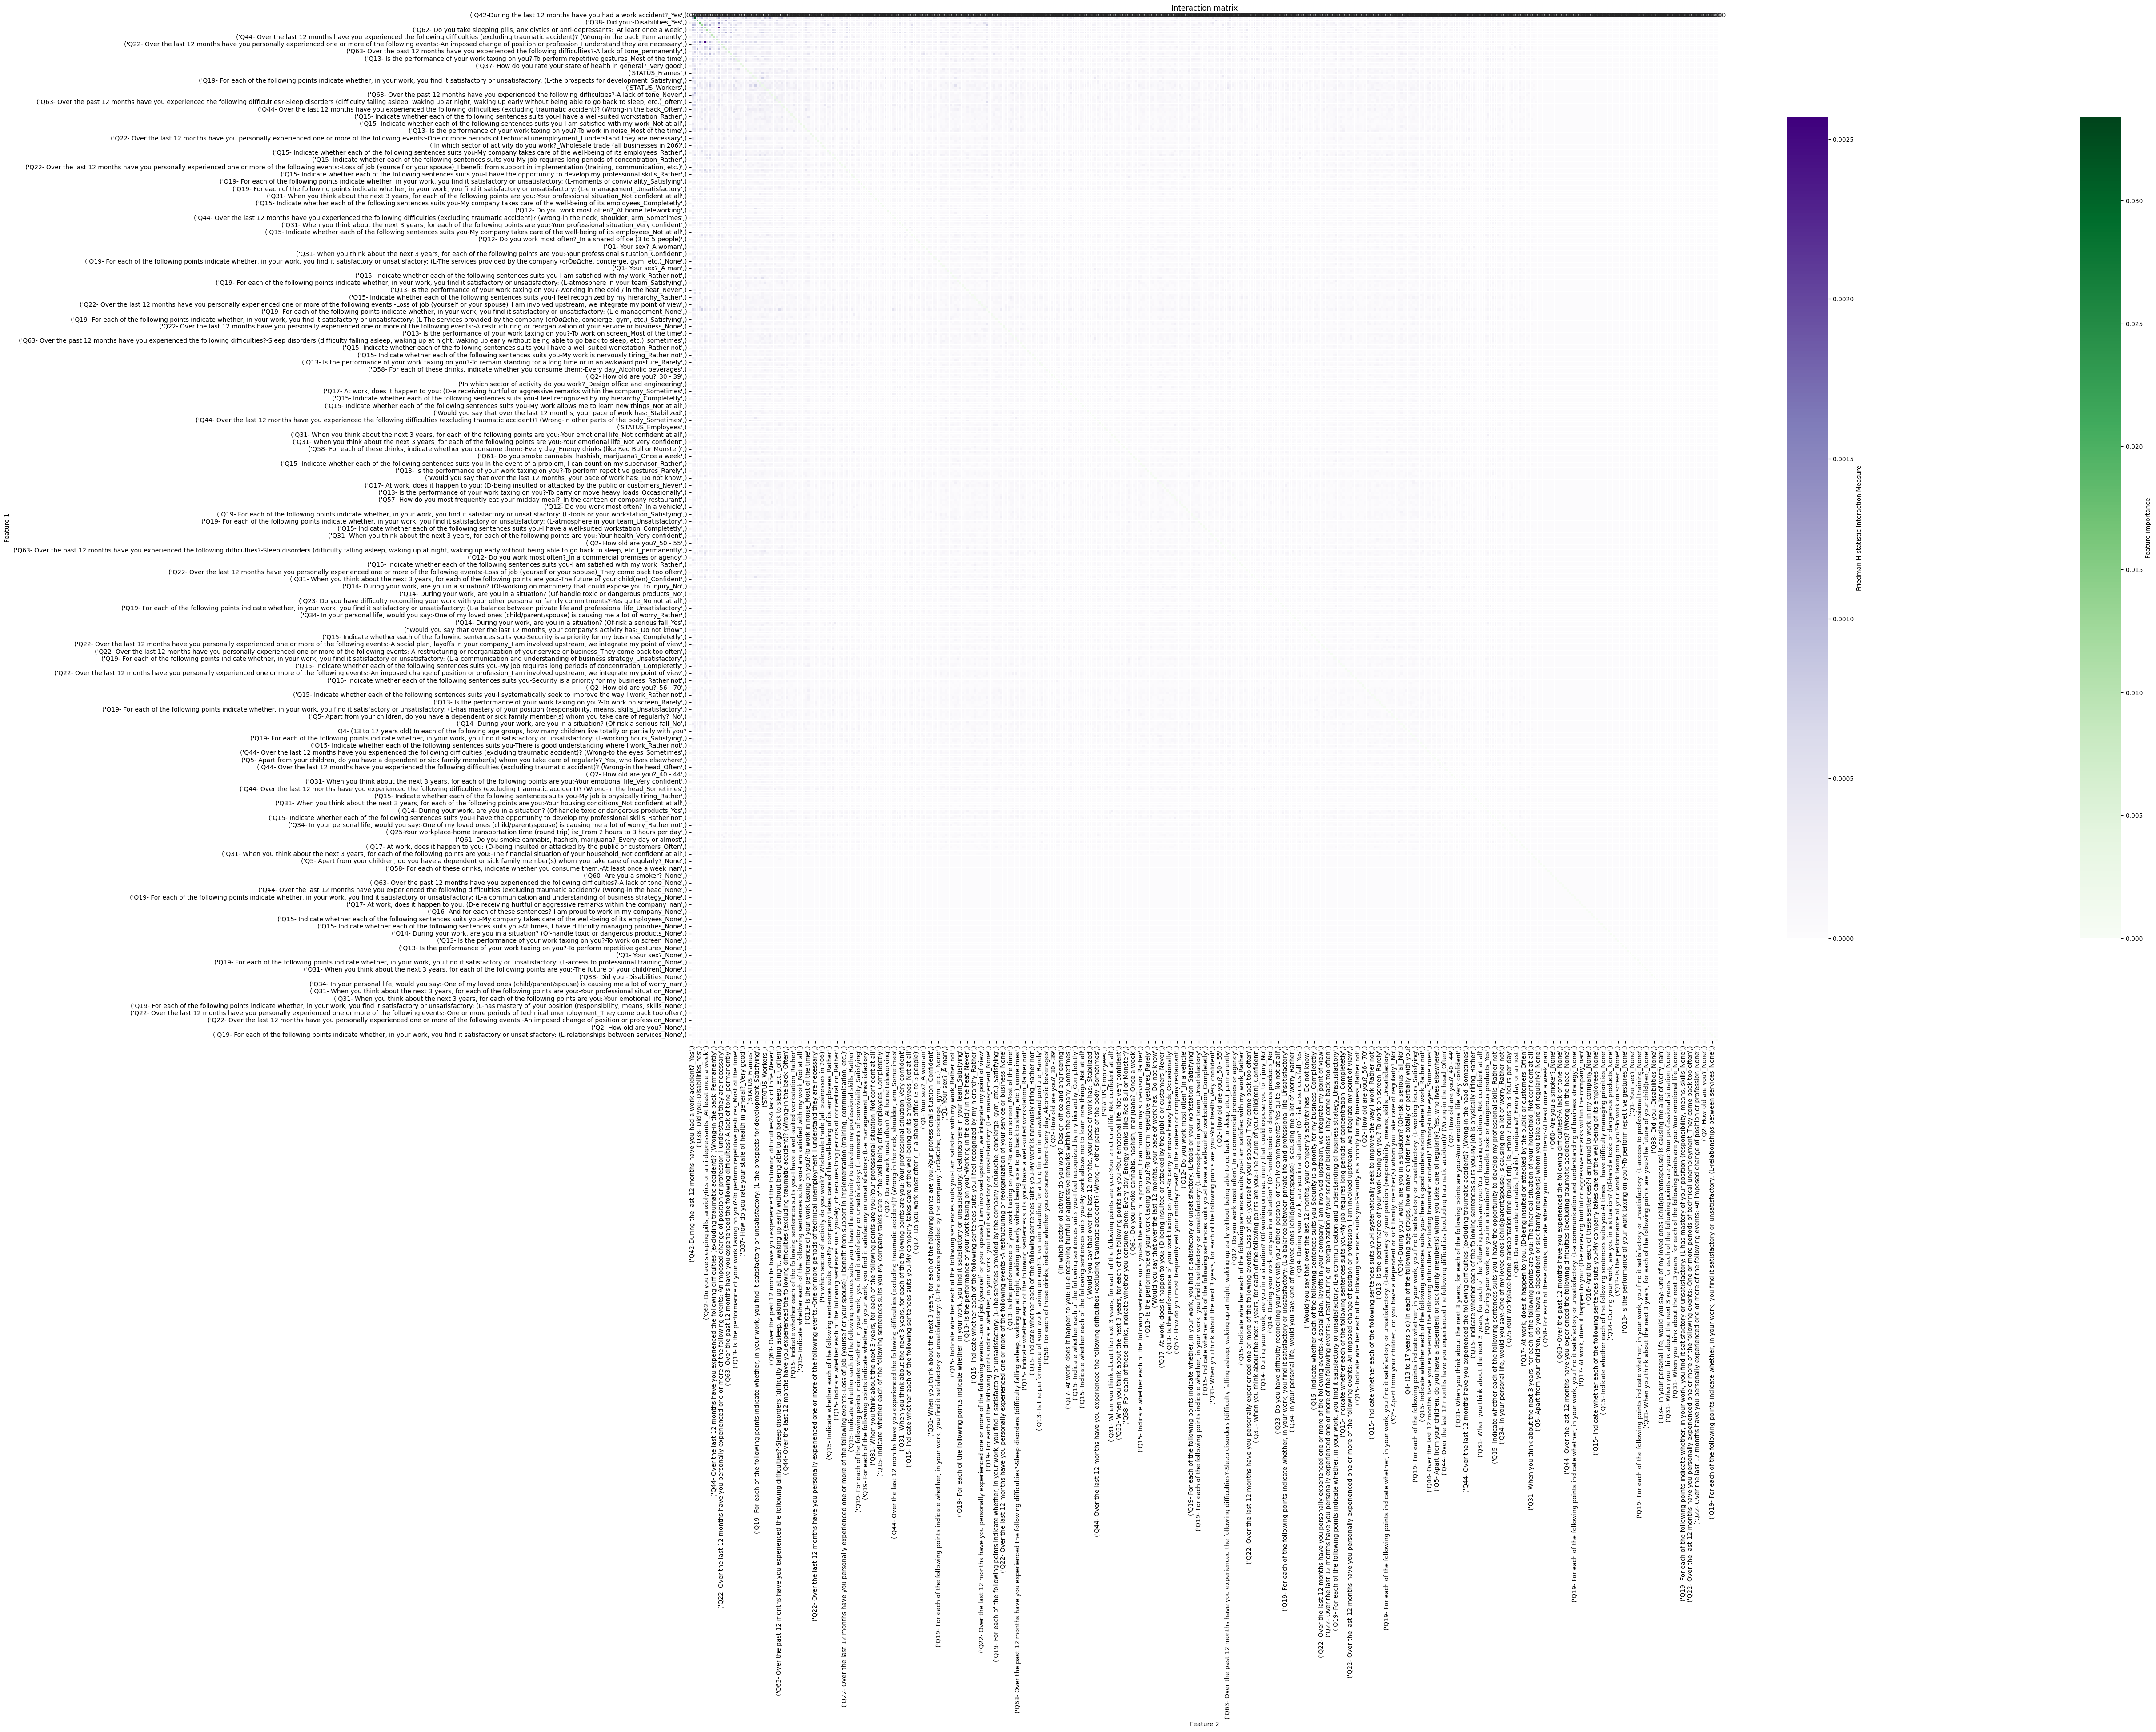

In [9]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(50, 30))
h_stat_unnormalised.plot(ax=ax)

# save the plot
fig.savefig('outputs/01_02_03_hStat/hStat_heatmap_unnormalised.png', bbox_inches='tight')

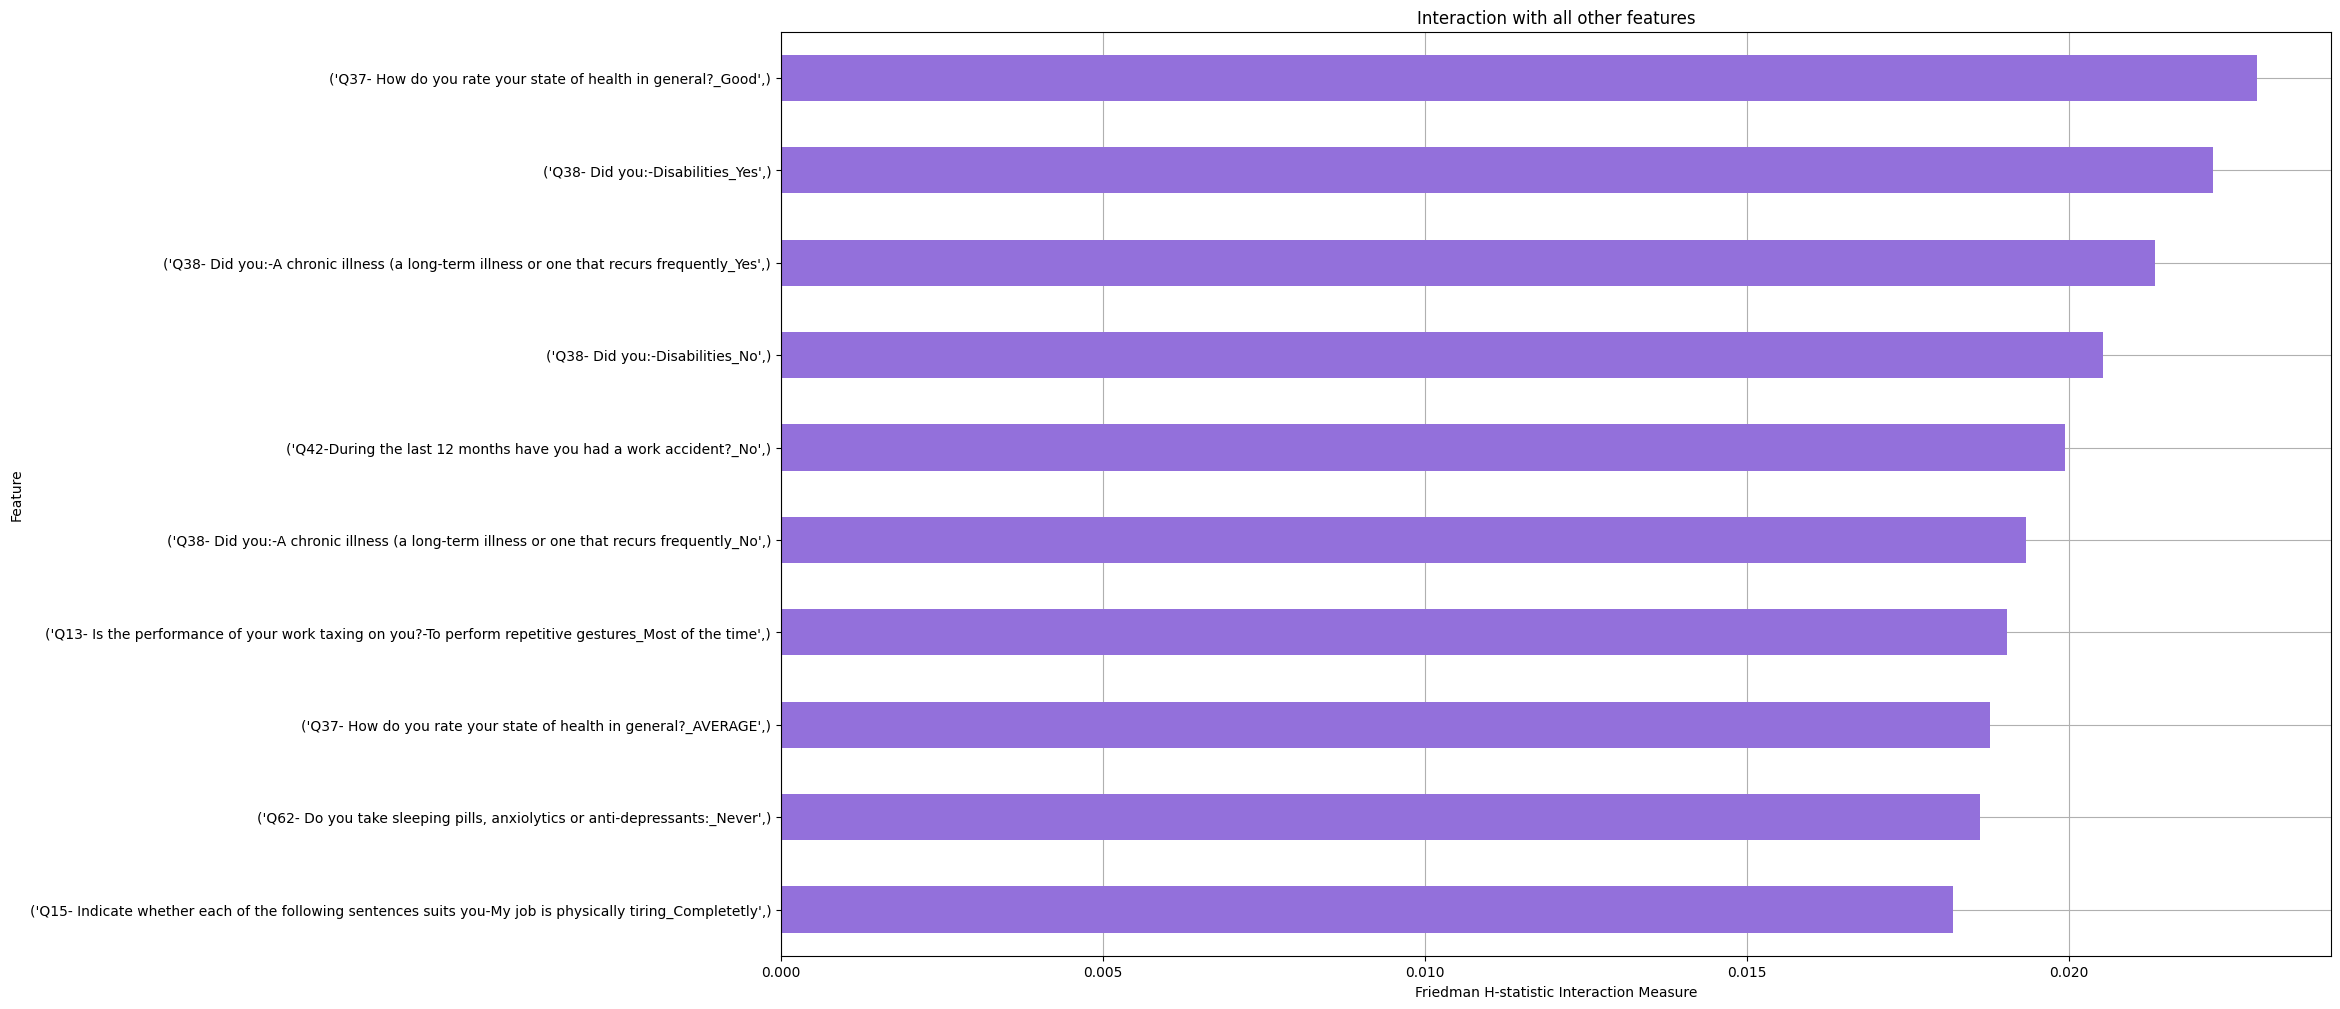

In [10]:
# Plot overall interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart_ova', ax=ax)

# save the plot
plt.savefig('outputs/01_02_03_hStat/overall_interactions_unnormalised.png', bbox_inches='tight')

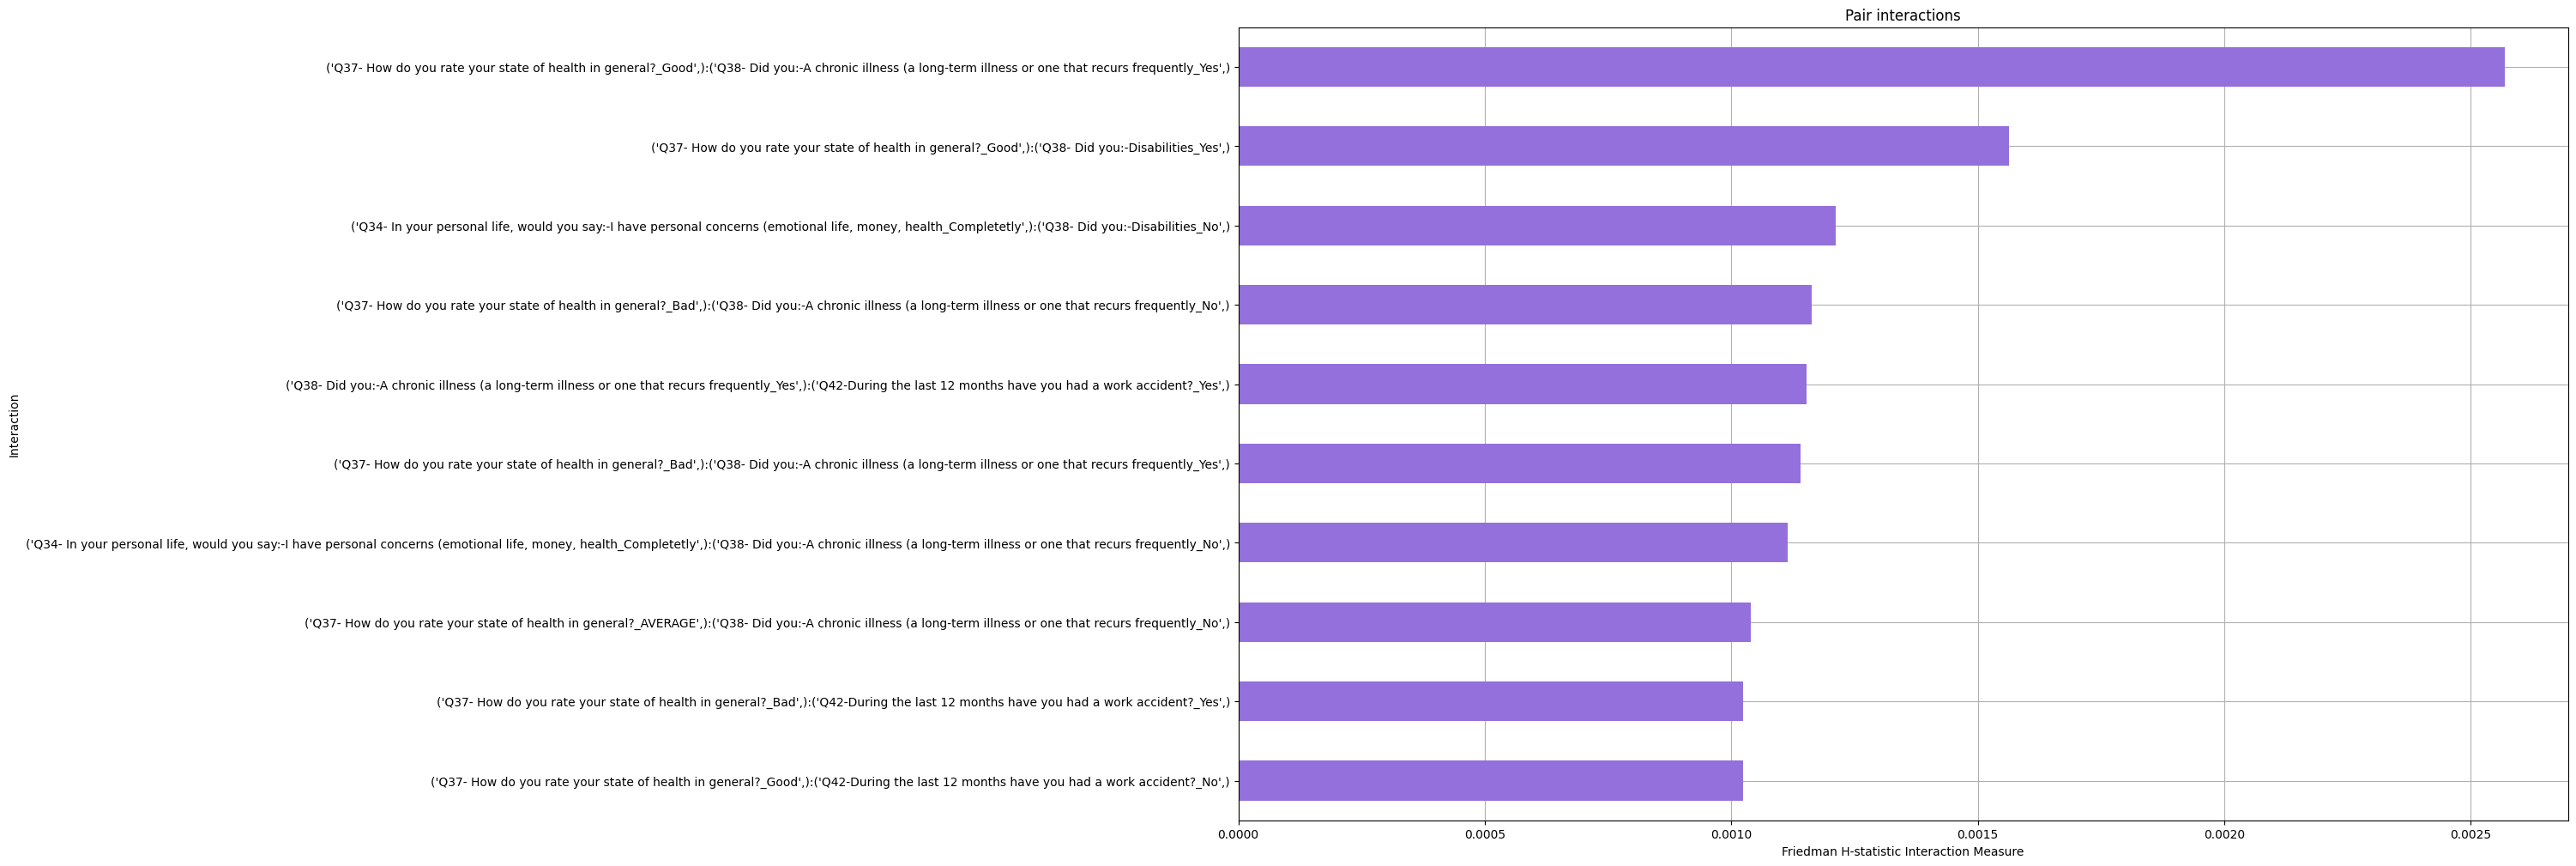

In [11]:
# Plot pairwise interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart', ax=ax)

# save the plot
plt.savefig('outputs/01_02_03_hStat/pairwise_interactions_unnormalised.png', bbox_inches='tight')

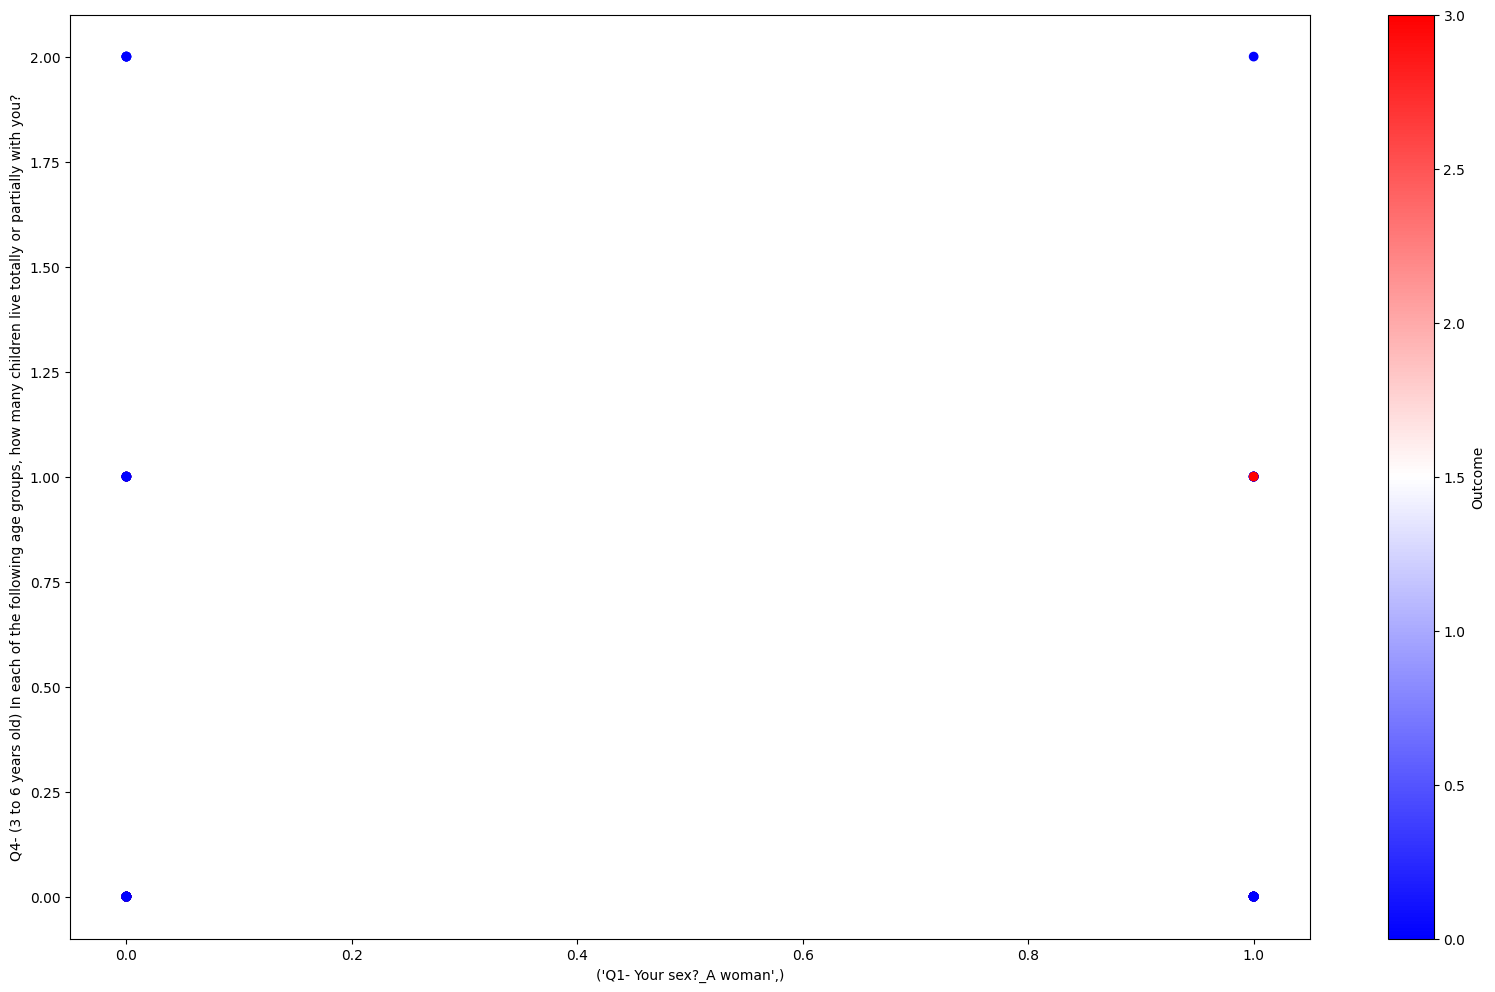

In [13]:
# Interaction between two features
fig, ax = plt.subplots(figsize=(20, 12))
plt.scatter(X_exp["('Q1- Your sex?_A woman',)"], X_exp["Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?"], c=y[:100], cmap='bwr')
plt.colorbar(label='Outcome', orientation='vertical')
plt.xlabel("('Q1- Your sex?_A woman',)")
plt.ylabel("Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?")
plt.savefig('outputs/01_02_03_hStat/interaction_between_two_features.png', bbox_inches='tight')
plt.show()

In [15]:
h_stat_unnormalised.feature_importance[0:20]

Feature  Importance
0   ('Q42-During the last 12 months have you had a...     0.03340
1   ('Q42-During the last 12 months have you had a...     0.03125
2                  ('Q38- Did you:-Disabilities_No',)     0.01925
3                 ('Q38- Did you:-Disabilities_Yes',)     0.01690
4   ('Q37- How do you rate your state of health in...     0.01275
5   ('Q62- Do you take sleeping pills, anxiolytics...     0.01220
6   ('Q38- Did you:-A chronic illness (a long-term...     0.01120
7   ('Q38- Did you:-A chronic illness (a long-term...     0.00960
8   ('Q23- Do you have difficulty reconciling your...     0.00950
9   ('Q44- Over the last 12 months have you experi...     0.00835
10  ('Q44- Over the last 12 months have you experi...     0.00770
11  ('Q22- Over the last 12 months have you person...     0.00705
12  ('Q62- Do you take sleeping pills, anxiolytics...     0.00665
13  ('Q63- Over the past 12 months have you experi...     0.00610
14  ('Q34- In your personal life, would you say:-I...     0.00575
15  ('Q37- How do you rate your state of health in...     0.00525
16  ('Q37- How do you rate your state of health in...     0.00475
17  ('Q13- Is the performance of your work taxing ...     0.00415
18  ('Q15- Indicate whether each of the following ...     0.00405
19  ('Q44- Over the last 12 months have you experi...     0.00390